## Import libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

## Import a file and display it

In [2]:
path='Savary_training_set_lenses/'
category='Lens_simulations/'
list_files=os.listdir(path+category)

In [3]:
file='8945.fits'

Text(0.5, 1.0, '8945.fits')

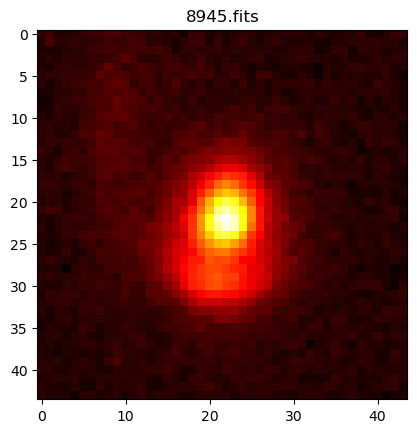

In [4]:
image_file=path+category+file
get_data, get_header = fits.getdata(image_file, header=True)
plt.imshow(get_data, cmap='hot')
plt.title(file)

## Let's define a function to get pixels values in a 5x5 px square at 4 corners of the picture

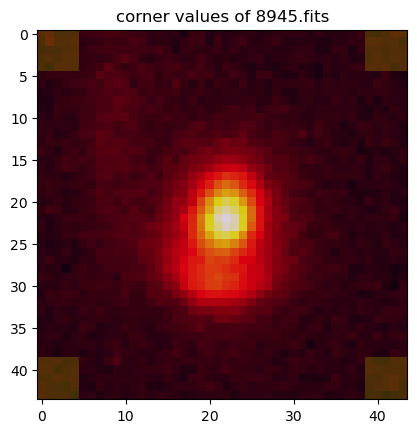

[ 3.11347318  7.07351923 -0.22379309 -0.46157753  1.36382699 -0.08525291
 10.72157192  2.16515708  1.74923921  4.69504404 -1.70933199 -1.06441951
 -1.28553843  0.81886971  2.93766284 -0.07715112  2.36754704 -0.20027938
  3.04916263  3.40672755  0.29020506 -3.05524755  2.99397635  4.21157551
  1.85521507 -2.25101519 -2.85897017  0.22832514  5.51720715  5.17682123
  3.54115796  3.53677797  0.90753537  1.62183177 -1.93821812  1.02750862
  0.85102439 -0.6494053   1.19502592  0.75543112 -0.54332167  3.50986719
 -0.14384861  2.38052177  2.70811749  2.46219015  2.51721454  4.22273874
 -2.16366863  0.99272925  1.48490768  1.40751935  1.93021733 -1.63831294
  0.15998894  1.86672664  1.52471053 -1.68768862  0.04893019  1.74989644
 -1.05431128 -0.25763127  3.65377964  1.27165027  2.23338455  2.75731087
 -0.47081569 -0.80414754 -1.93319055  1.74404297  2.75326943 -0.01686108
  0.52697617 -0.31707299 -4.81463403  2.13792883 -1.95500003 -1.39302546
  1.69760234  0.82822431  2.23819596  1.35997932  0

In [5]:
def corner_value(image,len=5):
    dimensions=np.shape(image)
    
    data=image[:len,:len] #up left corner
    data=np.append(data,image[:len,dimensions[0]-len:]) #up right corner
    data=np.append(data,image[dimensions[0]-len:,:len]) #down left corner
    data=np.append(data,image[dimensions[0]-len:,dimensions[1]-len:]) #down right corner
    
    return data

def corner_mask(image,len=5):
    dimensions=np.shape(image)
    mask=np.zeros(dimensions)
    
    mask[:len,:len]=1
    mask[:len,dimensions[0]-len:]=1
    mask[dimensions[0]-len:,:len]=1
    mask[dimensions[0]-len:,dimensions[1]-len:]=1
    
    return mask


plt.imshow(get_data,cmap='hot')
plt.imshow(corner_mask(get_data),alpha=0.2)
plt.title(f'corner values of {file}')
plt.show()
print(corner_value(get_data))

## Determination of the mean background and the std of the background in the dataset

In [6]:
mean_bg=[]
std_bg=[]
for file in list_files:
    image_file=path+category+file
    get_data, get_header = fits.getdata(image_file, header=True)
    corners=corner_value(get_data)
    mean_bg.append(np.mean(corners))
    std_bg.append(np.std(corners))

(array([2.19812207e-01, 5.08249145e-03, 1.64237715e-03, 7.54605717e-04,
        3.55108573e-04, 2.44137144e-04, 8.87771432e-05, 4.43885716e-05,
        2.21942858e-05, 2.21942858e-05, 2.21942858e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.21942858e-05, 0.00000000e+00, 0.00000000e+00, 2.21942858e-05]),
 array([ 1.17474897,  5.55811724,  9.94148551, 14.32485378, 18.70822205,
        23.09159032, 27.47495859, 31.85832686, 36.24169514, 40.62506341,
        45.00843168, 49.39179995, 53.77516822, 58.15853649, 62.54190476,
        66.92527303, 71.3086413 , 75.69200957, 80.07537784, 84.45874612,
        88.84211439]),
 <BarContainer object of 20 artists>)

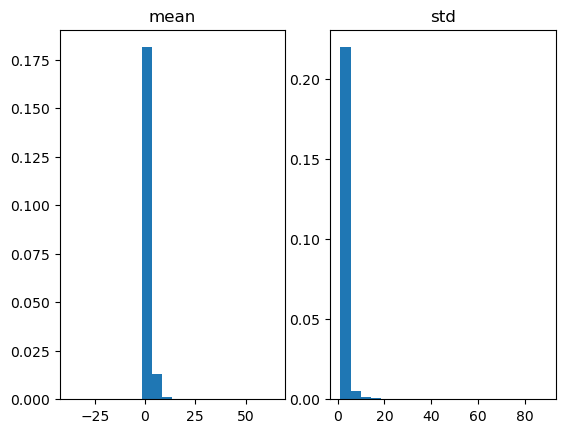

In [7]:
plt.subplot(121)
plt.title('mean')
plt.hist(mean_bg,bins=20,density=True)
plt.subplot(122)
plt.title('std')
plt.hist(std_bg,bins=20,density=True)